In [217]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

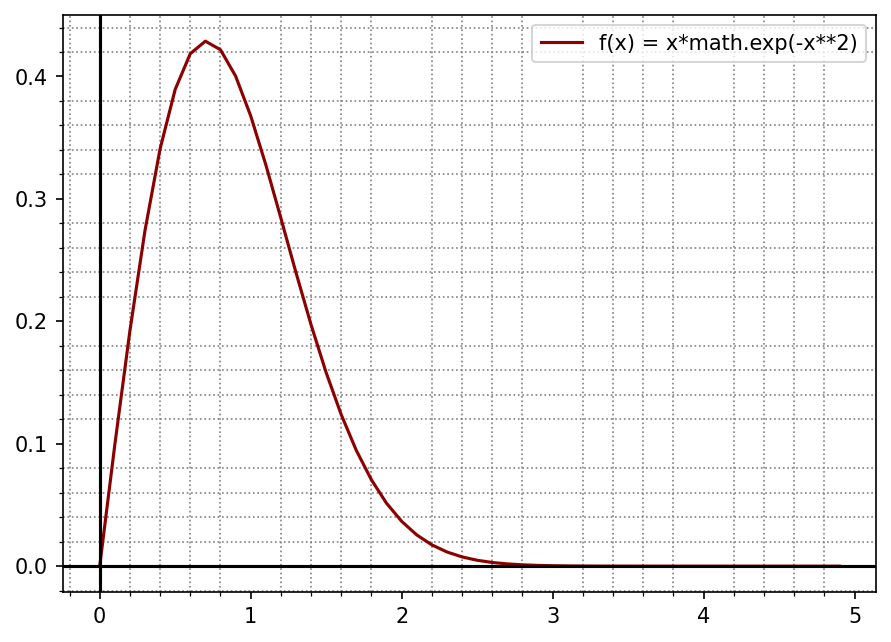

In [218]:
def graph():
    
    fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
    f = lambda x: x*math.exp(-x**2)
    x=np.arange(0, 5, step = 0.1)
    y = []
    for i in x:
        y.append(f(i))  
     
    ax.plot(x,y, color = "darkred",label = "f(x) = x*math.exp(-x**2)")
    plt.minorticks_on()
    plt.grid(which='major',
            color = 'grey', 
            linewidth = 0.7)
    plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
    ax.legend()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.grid()

graph()

In [219]:
f = lambda x: x*math.exp(-x**2)
df = lambda x: -(2*x**(2)-1)*math.exp(-x**2)  

## f'(x) = 0 при x = 1/sqrt(2), (x >= 0)
## fmax = f(1/sqrt(2))
## Вычитаем половину fmax из функции

In [220]:
fmax = f(1/math.sqrt(2))
f_new = lambda x: f(x) - 1/2*fmax

#возможние функции для МПИ
f1 = lambda x: fmax/2*math.exp(x**2)  
f2 = lambda x: math.sqrt(math.log(2*x/fmax))

# Локализация корней

In [221]:
eps = 1e-3
x = np.linspace(0,2,100)
root_intervals = []

for i in range(1,len(x)):
    if f_new(x[i-1])*f_new(x[i]) <= 0:
        root_intervals.append((x[i-1],x[i]))

print(' '.join(map(str, root_intervals))) 

(0.22222222222222224, 0.24242424242424243) (1.3535353535353536, 1.373737373737374)


# Проверка на сходимость МПИ

In [222]:
df1 = lambda x: 2*x*fmax/2*math.exp(x**2) 
df2 = lambda x: 1/(2*x*math.sqrt(2*x/fmax))

def check_mpi_function(a,b,f):
    flag = 1
    for i in np.arange(a, b, 0.01):
        if f(i) >= 1:
            flag = 0
    if flag == 1:
        print("МПИ сходится на {:.3f}, {:.3f}". format(a,b))
    else:
        print("МПИ не сходится на {:.3f}, {:.3f}". format(a,b))
        
check_mpi_function(root_intervals[0][0], root_intervals[0][1],df1)  
check_mpi_function(root_intervals[0][0], root_intervals[0][1],df2)  
check_mpi_function(root_intervals[1][0], root_intervals[1][1],df1)  
check_mpi_function(root_intervals[1][0], root_intervals[1][1],df2)  

МПИ сходится на 0.222, 0.242
МПИ не сходится на 0.222, 0.242
МПИ не сходится на 1.354, 1.374
МПИ сходится на 1.354, 1.374


# f1 сходится на [0.222, 0.242]
# f2 сходится на [1.354, 1.374]

# MПИ

In [223]:
def mpi(a,b,f,eps):
    x0 = (a+b)/2
    x = f(x0)
    while(abs(x-x0) > eps):
        x0 = x
        x = f(x)
    return x

# Вычисление корней и ширини на полувисоте

In [224]:
x1 = mpi(root_intervals[0][0], root_intervals[0][1], f1, eps)
x2 = mpi(root_intervals[1][0], root_intervals[1][1], f2, eps)
print("x1 = ", round(x1,3))
print("x2 = ", round(x2,3))

x1 =  0.226
x2 =  1.359


In [225]:
print("Ширина на полувисоте =", round(x2-x1,3))

Ширина на полувисоте = 1.133
